In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
frames = []
meta = pd.read_csv(r"C:\Users\admin\Desktop\UWR\Lato_2020_2021\Project DL\Project2\musicnet_metadata.csv")
length_meta = pd.read_csv(r"C:\Users\admin\Desktop\UWR\Lato_2020_2021\Project DL\Project2\JTM\data\musicnet_metadata_train.csv")

for file in os.listdir():
    if file.split(".")[1] == 'csv':
        
        if meta[meta['id'] == int(file.split(".")[0])]['ensemble'].values[0] == "Solo Piano":
            df = pd.read_csv(file)
        else:
            continue
            
        df['id'] = file.split(".")[0]
        df['length'] = length_meta[length_meta['id'] == int(file.split(".")[0])]['length'].values[0]
        frames.append(df)

master_df = pd.concat(frames)
master_df['start_time'] = master_df['start_time'] * 160 / 441

master_df['end_time'] = master_df['end_time'] * 160 / 441

master_df['id'] = master_df['id'].astype('category')
master_df['id_cat'] = master_df['id'].cat.codes

In [3]:
master_df

,start_time,end_time,instrument,note,start_beat,end_beat,note_value,id,length,id_cat
0,3.268136e+04,3.361016e+04,1,42,0.000000,0.100000,Triplet Sixty Fourth,1733,8736183,0
1,3.268136e+04,8.209342e+04,1,69,0.000000,3.000000,Dotted Quarter,1733,8736183,0
2,5.441524e+04,6.723265e+04,1,61,1.000000,1.000000,Eighth,1733,8736183,0
3,6.723265e+04,8.209342e+04,1,49,2.000000,1.000000,Eighth,1733,8736183,0
4,8.209342e+04,8.376526e+04,1,41,3.000000,0.100000,Triplet Sixty Fourth,1733,8736183,0
...,...,...,...,...,...,...,...,...,...,...
3368,7.479228e+06,7.483500e+06,1,86,528.739583,0.239583,Sixteenth,2678,7557956,152
3369,7.481271e+06,7.483500e+06,1,84,528.864583,0.114583,Thirty Second,2678,7557956,152
3370,7.483686e+06,7.504491e+06,1,83,528.989583,0.989583,Quarter,2678,7557956,152
3371,7.483686e+06,7.504677e+06,1,79,529.000000,0.989583,Quarter,2678,7557956,152


In [5]:
# master_df.to_csv('metadata_transcript_train.csv', index=False)

In [14]:
master_silence = master_df.copy()


In [17]:
up_to_covered = master_silence.iloc[0]['start_time']

for i in range(1, master_silence.shape[0]):
    if master_silence.iloc[i-1]['start_time'] > up_to_covered:
        up_to_covered = master_silence.iloc[i]['start_time']
    if master_silence.iloc[i]['start_time'] > master_silence.iloc[i-1]['end_time'] \
                & master_silence.iloc[i]['start_time'] > 
    up_to_covered = master_silence.iloc[i]['end_time']

CategoricalDtype(categories=['1733', '1734', '1735', '1749', '1750', '1751', '1752',
                  '1755', '1756', '1757',
                  ...
                  '2608', '2611', '2614', '2618', '2619', '2620', '2632',
                  '2633', '2677', '2678'],
                 ordered=False)

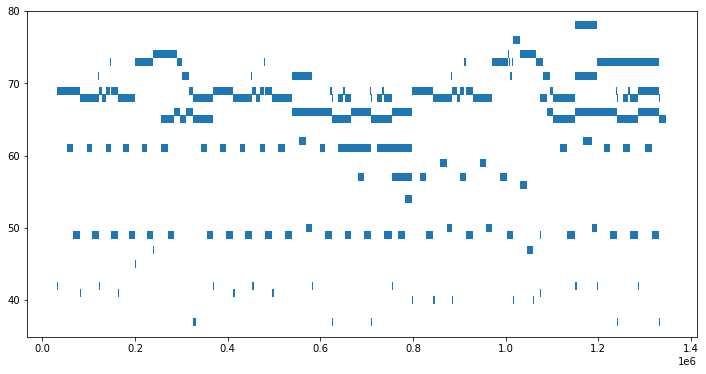

In [20]:
import matplotlib.pyplot as plt

master_df = master_df.sort_values(by=['id', 'start_time'])

y = master_df['note'].iloc[0:200].values
xmin = master_df['start_time'].iloc[0:200].values
xmax = master_df['end_time'].iloc[0:200].values


fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax.hlines(y, xmin, xmax, linewidth=8)
plt.show()

In [21]:
master_df

,start_time,end_time,instrument,note,start_beat,end_beat,note_value,id,length,id_cat
0,3.268136e+04,3.361016e+04,1,42,0.000000,0.100000,Triplet Sixty Fourth,1733,8736183,0
1,3.268136e+04,8.209342e+04,1,69,0.000000,3.000000,Dotted Quarter,1733,8736183,0
2,5.441524e+04,6.723265e+04,1,61,1.000000,1.000000,Eighth,1733,8736183,0
3,6.723265e+04,8.209342e+04,1,49,2.000000,1.000000,Eighth,1733,8736183,0
4,8.209342e+04,8.376526e+04,1,41,3.000000,0.100000,Triplet Sixty Fourth,1733,8736183,0
...,...,...,...,...,...,...,...,...,...,...
3368,7.479228e+06,7.483500e+06,1,86,528.739583,0.239583,Sixteenth,2678,7557956,152
3369,7.481271e+06,7.483500e+06,1,84,528.864583,0.114583,Thirty Second,2678,7557956,152
3370,7.483686e+06,7.504491e+06,1,83,528.989583,0.989583,Quarter,2678,7557956,152
3371,7.483686e+06,7.504677e+06,1,79,529.000000,0.989583,Quarter,2678,7557956,152
